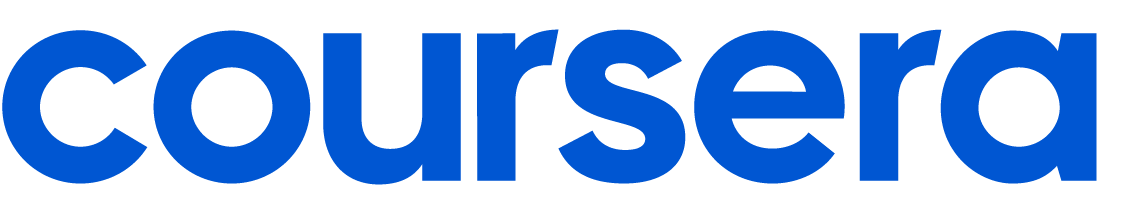

# Welcome to the Data Science Coding Challange!

Test your skills in a real-world coding challenge. Coding Challenges provide CS & DS Coding Competitions with Prizes and achievement badges!

CS & DS learners want to be challenged as a way to evaluate if they’re job ready. So, why not create fun challenges and give winners something truly valuable such as complimentary access to select Data Science courses, or the ability to receive an achievement badge on their Coursera Skills Profile - highlighting their performance to recruiters.

## Introduction

In this challenge, you'll get the opportunity to **tackle one of the most industry-relevant maching learning problems** with a unique dataset that will put your modeling skills to the test. ***Subscription services*** are leveraged by companies across many industries, from *fitness* to video streaming to *retail*. One of the primary objectives of companies with subscription services is to **decrease churn and ensure that users are retained as subscribers**. In order to do this efficiently and systematically, many companies employ machine learning to *predict* which users are at **the highest risk of churn**, so that **proper interventions** can be effectively deployed to the right audience.

In this challenge, we will be tackling the **churn prediction problem on a very unique and interesting group of subscribers** on a video streaming service! 

Imagine that you are a new data scientist at this video streaming company and you are tasked with building a model that can predict which existing subscribers will continue their subscriptions for another month. We have provided a dataset that is a sample of subscriptions that were initiated in 2021, all snapshotted at a particular date before the subscription was cancelled. Subscription cancellation can happen for a multitude of reasons, including:

* the customer **completes all content they were interested in, and no longer need the subscription**

* the customer finds themselves to **be too busy and cancels their subscription until a later time**

* the customer **determines that the streaming service is not the best fit for them**, so they cancel and look for something better suited

Regardless the reason, this video streaming company has a vested interest in understanding the likelihood of each individual customer to churn in their subscription so that resources can be allocated appropriately to support customers. In this challenge, you will use your machine learning toolkit to do just that!

## Understanding the Datasets

### Train vs. Test
In this competition, you’ll gain access to **two datasets that are samples of past subscriptions** of a video streaming platform that contain information about 

- **the customer, the customers streaming preferences, and their activity in the subscription** thus far. 

- One dataset is titled `train.csv` and the other is titled `test.csv`.

- `train.csv` contains 70% of the overall sample (***243,787 subscriptions to be exact***) and importantly, will reveal whether or not the subscription was continued into the next month (the “ground truth”).

- The `test.csv` dataset contains the exact same information about the remaining segment of the overall sample (**104,480 subscriptions to be exact**), but does not disclose the “ground truth” for each subscription. It’s your job to predict this outcome!

Using the patterns you find in the `train.csv` data, predict whether the subscriptions in `test.csv` will be continued for another month, or not.

### Dataset descriptions
Both `train.csv` and `test.csv` contain one row for each unique subscription. For each subscription, **a single observation (`CustomerID`)** is included during which the subscription was active. --> no duiplicates

In addition to this identifier column, the `train.csv` dataset also contains **the target label for the task**, a binary column `Churn`.

Besides that column, both datasets have an identical set of features that can be used to train your model to make predictions. Below you can see descriptions of each feature. Familiarize yourself with them so that you can harness them most effectively for this machine learning task!

In [55]:
import pandas as pd
data_descriptions = pd.read_csv('data_descriptions.csv')
pd.set_option('display.max_colwidth', None)
data_descriptions


,Column_name,Column_type,Data_type,Description
0,AccountAge,Feature,integer,The age of the user's account in months.
1,MonthlyCharges,Feature,float,The amount charged to the user on a monthly basis.
2,TotalCharges,Feature,float,The total charges incurred by the user over the account's lifetime.
3,SubscriptionType,Feature,object,"The type of subscription chosen by the user (Basic, Standard, or Premium)."
4,PaymentMethod,Feature,string,The method of payment used by the user.
5,PaperlessBilling,Feature,string,Indicates whether the user has opted for paperless billing (Yes or No).
6,ContentType,Feature,string,"The type of content preferred by the user (Movies, TV Shows, or Both)."
7,MultiDeviceAccess,Feature,string,Indicates whether the user has access to the service on multiple devices (Yes or No).
8,DeviceRegistered,Feature,string,"The type of device registered by the user (TV, Mobile, Tablet, or Computer)."
9,ViewingHoursPerWeek,Feature,float,The number of hours the user spends watching content per week.


#### Attentions:
Which columns we need and then the index? Based upon this hint

* the customer: Age, Gender, Genre Preference, WatchlistSize, Parental Control, UserRating

* the customers streaming preferences: TotalCharges, SubscriptionType, ContentType, MultipleDeviceAccess, PaperlessBilling, SubtitlesEnabled

* and their activity in the subscription:DeviceRegistered, ViewingHoursPerWeek, AverageViewingDuration, SupportTicketsPerMonth, Churn	


## How to Submit your Predictions to Coursera
Submission Format:

In this notebook you should follow the steps below 
1. to explore the data, train a model using the data in `train.csv`, and 
2. then score your model using the data in `test.csv`. 

Your final submission should be a **dataframe** (call it ***`prediction_df`*** with ***two columns*** and exactly **104,480 rows (plus a header row)**. 

- The *first column* should be ***`CustomerID`*** so that we know which prediction belongs to which observation.

- The *second column* should be called ***`predicted_probability`*** and should be a numeric column representing the __likellihood that the subscription will churn__.

Your submission will show an error if you have extra columns (beyond `CustomerID` and `predicted_probability`) or extra rows. The order of the rows does not matter.

The naming convention of the dataframe and **columns are critical for our autograding**, so please make sure to use the exact naming conventions of `prediction_df` with column names `CustomerID` and `predicted_probability`!

To determine your final score, we will compare your `predicted_probability` predictions to the source of truth labels for the observations in `test.csv` and calculate the [ROC AUC](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html).

We choose this metric because we not only want to be able to predict which subscriptions will be retained, but also want a well-calibrated likelihood score that can be used to target interventions and support most accurately.

## Import Python Modules

**Notes:** I expanded the the module Scipy and keras to know what the libraries functions

First, import the primary modules that will be used in this project. Remember as this is an open-ended project please feel free to make use of any of your favorite libraries that you feel may be useful for this challenge. For example some of the following popular packages may be useful:

1. pandas
2. numpy
3. Scipy: 
```
        - scipy.optimize: For optimization algorithms.
        - scipy.integrate: For integration routines.
        - scipy.interpolate: For interpolation techniques.
        - scipy.stats: For sta
        
 ```
 
   
        
4. Scikit-learn

5. keras
```
        - model = keras.Sequential()
        - model.add(keras.layers.Dense(units=, activation='relu', input_shape=(input_dim,)))
        - model.add(keras.layers.Dense(units=, activation='softmax'))
        - model.fit(x_train, y_train, epochs=, batch_size=)
```

6. maplotlib

7. seaborn
- etc, etc
 

In [56]:
# Import required packages

# Data packages
import pandas as pd#1
import numpy as np#2

# Machine Learning / Classification packages #4
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.preprocessing import FunctionTransformer

# Visualization Packages
from matplotlib import pyplot as plt #6
import seaborn as sns #7
%matplotlib inline

In [57]:
# Import any other packages you may want to use 

# Import #3 SciPy

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score  # Fixed import statement
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

import warnings
warnings.filterwarnings("ignore", category=UserWarning) 
%matplotlib inline

# Install and Import keras #5


In [58]:

# upgrade pip to 24.0
!pip install --upgrade pip

18088.72s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


## Load the Data

Let's start by loading the dataset `train.csv` into a dataframe `train_df`, and `test.csv` into a dataframe `test_df` and display the shape of the dataframes.

In [59]:
train_df = pd.read_csv("train.csv")
print('train_df Shape:', train_df.shape)
train_df.head(10)

train_df Shape: (243787, 21)


,AccountAge,MonthlyCharges,TotalCharges,SubscriptionType,PaymentMethod,PaperlessBilling,ContentType,MultiDeviceAccess,DeviceRegistered,ViewingHoursPerWeek,...,ContentDownloadsPerMonth,GenrePreference,UserRating,SupportTicketsPerMonth,Gender,WatchlistSize,ParentalControl,SubtitlesEnabled,CustomerID,Churn
0,20,11.055215,221.104302,Premium,Mailed check,No,Both,No,Mobile,36.758104,...,10,Sci-Fi,2.176498,4,Male,3,No,No,CB6SXPNVZA,0
1,57,5.175208,294.986882,Basic,Credit card,Yes,Movies,No,Tablet,32.450568,...,18,Action,3.478632,8,Male,23,No,Yes,S7R2G87O09,0
2,73,12.106657,883.785952,Basic,Mailed check,Yes,Movies,No,Computer,7.395160,...,23,Fantasy,4.238824,6,Male,1,Yes,Yes,EASDC20BDT,0
3,32,7.263743,232.439774,Basic,Electronic check,No,TV Shows,No,Tablet,27.960389,...,30,Drama,4.276013,2,Male,24,Yes,Yes,NPF69NT69N,0
4,57,16.953078,966.325422,Premium,Electronic check,Yes,TV Shows,No,TV,20.083397,...,20,Comedy,3.616170,4,Female,0,No,No,4LGYPK7VOL,0
5,113,7.295744,824.419081,Premium,Mailed check,Yes,Both,No,Mobile,21.678290,...,35,Comedy,3.721134,8,Female,2,Yes,Yes,JY5HS0GWHW,0
6,38,12.340675,468.945639,Premium,Bank transfer,No,Both,No,Computer,36.512761,...,28,Action,4.090868,9,Female,20,No,Yes,79XSO6P5O3,0
7,25,7.247550,181.188753,Standard,Electronic check,Yes,TV Shows,No,TV,16.355816,...,10,Fantasy,3.410221,2,Female,22,No,No,2LDC9AQ3C5,0
8,26,19.803233,514.884050,Standard,Bank transfer,No,Movies,No,Tablet,8.202929,...,28,Fantasy,2.679986,0,Male,5,Yes,Yes,74DURHL3Y8,1
9,14,18.842934,263.801080,Standard,Bank transfer,No,Movies,No,Computer,38.560694,...,0,Comedy,2.993441,0,Male,18,No,No,CY8S2R3A1T,0


In [60]:
test_df = pd.read_csv("test.csv")
print('test_df Shape:', test_df.shape)
test_df.head(10)

test_df Shape: (104480, 20)


,AccountAge,MonthlyCharges,TotalCharges,SubscriptionType,PaymentMethod,PaperlessBilling,ContentType,MultiDeviceAccess,DeviceRegistered,ViewingHoursPerWeek,AverageViewingDuration,ContentDownloadsPerMonth,GenrePreference,UserRating,SupportTicketsPerMonth,Gender,WatchlistSize,ParentalControl,SubtitlesEnabled,CustomerID
0,38,17.869374,679.036195,Premium,Mailed check,No,TV Shows,No,TV,29.126308,122.274031,42,Comedy,3.522724,2,Male,23,No,No,O1W6BHP6RM
1,77,9.912854,763.289768,Basic,Electronic check,Yes,TV Shows,No,TV,36.873729,57.093319,43,Action,2.021545,2,Female,22,Yes,No,LFR4X92X8H
2,5,15.019011,75.095057,Standard,Bank transfer,No,TV Shows,Yes,Computer,7.601729,140.414001,14,Sci-Fi,4.806126,2,Female,22,No,Yes,QM5GBIYODA
3,88,15.357406,1351.451692,Standard,Electronic check,No,Both,Yes,Tablet,35.586430,177.002419,14,Comedy,4.943900,0,Female,23,Yes,Yes,D9RXTK2K9F
4,91,12.406033,1128.949004,Standard,Credit card,Yes,TV Shows,Yes,Tablet,23.503651,70.308376,6,Drama,2.846880,6,Female,0,No,No,ENTCCHR1LR
5,5,19.037169,95.185843,Basic,Electronic check,Yes,Movies,Yes,Tablet,35.058340,62.351472,1,Comedy,1.695250,1,Male,6,Yes,No,7A88BB5IO6
6,103,9.135067,940.911867,Standard,Credit card,No,Both,Yes,Computer,6.237829,120.736176,9,Sci-Fi,3.912529,4,Male,22,Yes,No,70OMW9XEWR
7,22,7.069956,155.539038,Basic,Electronic check,No,Both,Yes,Computer,6.372862,111.135950,35,Fantasy,2.488022,9,Female,7,No,No,EL1RMFMPYL
8,21,6.615587,138.927320,Standard,Electronic check,Yes,Both,Yes,Mobile,18.564468,37.712931,44,Fantasy,3.425709,5,Female,8,No,Yes,4IA2QPT6ZK
9,86,11.439289,983.778885,Standard,Credit card,Yes,Movies,No,Tablet,27.467128,17.324508,19,Sci-Fi,1.772171,9,Male,3,No,No,AEDCWHSJDN


### Comments:
- The output confirms the succesful import of two datasets, with their exact numbers of rows: 243787 for the train_df and 104480 for the test_df
- As the Ground truth is not provided in the test_df, the Churn column is missing. This can be confirmed further when called out all of the columns names.

## 
Explore, Clean, Validate, and Visualize the Data (optional)

Feel free to 
- ***explore***, 
- ***clean***, 
- ***validate***, and 
- ***visualize*** the data 
however you see fit for this competition to help **determine or optimize your predictive model**

. Please note - the final autograding will only be **on the accuracy of the `prediction_df` predictions**

In [61]:

numerical_columns_train = train_df.select_dtypes(include=['float64','int64']).columns.tolist()

# Create a DataFrame with the selected numerical columns
df_num_train = train_df[numerical_columns_train]
print(df_num_train .shape)

numerical_columns_test = test_df.select_dtypes(include=['float64','int64']).columns.tolist()

# Create a DataFrame with the selected numerical columns
df_num_test = test_df[numerical_columns_test]
print(df_num_test .shape)



(243787, 10)
(104480, 9)


### Comments:
- Both datasets are dataframe structures with matching datatypes and columb Churning is not available in the test_df.
- The outputs show no count for non- null values, which is great.
- The data type of each column makes sense and consistent between the two datasets. All of the numeric columns are in eiher int64 or float64 kinds. 
-There are 11 columns with object type, which is differnt from the data_descriptions output that shows only one 1 object datatype as in 'SubscriptionType'. 
- The othe 10 columns wer orginnaly identifed as string type instead.
- The 'Churn' column is of int64, 0 and 1, 0 as 'False' value and 1 = 'True'.
- Categorical values for SubscriptionType, PaymentMethod, ContentType, DeviceRegistered, GenrePreference and Gender
- Boolean values for PaperlessBilling, MultiDeviceAccess, ParentalControl, SubtitlesEnabled

### 
Comments
- There are 2 different formattings in the PaperlessBilling.In the train_df, the values are stored as No and Yes but in the test_df they are 0 and 1 --> convert the those from train_df to 0 and 1

In [62]:
# df_booleans_test = test_df[booleans]
df_booleans_train = train_df.loc[:, ['PaperlessBilling', 'MultiDeviceAccess', 'ParentalControl', 'SubtitlesEnabled']]
df_booleans_test = test_df.loc[:, ['PaperlessBilling', 'MultiDeviceAccess', 'ParentalControl', 'SubtitlesEnabled']]
print(df_booleans_train.describe(),'\n')
print(df_booleans_test.describe())
        

       PaperlessBilling MultiDeviceAccess ParentalControl SubtitlesEnabled
count            243787            243787          243787           243787
unique                2                 2               2                2
top                  No                No             Yes              Yes
freq             121980            122035          122085           122180 

       PaperlessBilling MultiDeviceAccess ParentalControl SubtitlesEnabled
count            104480            104480          104480           104480
unique                2                 2               2                2
top                  No               Yes              No              Yes
freq              52564             52387           52520            52259


In [63]:
def convert_yes_no_to_int(df):
    # Only select columns with object/string type (likely to have 'Yes'/'No')
    for col in df.select_dtypes(include=['object', 'category']):
        df[col] = df[col].map({'Yes': 1, 'No': 0}).fillna(0).astype(int)
    return df
convert_yes_no_to_int(df_booleans_train)
convert_yes_no_to_int(df_booleans_test)

,PaperlessBilling,MultiDeviceAccess,ParentalControl,SubtitlesEnabled
0,0,0,0,0
1,1,0,1,0
2,0,1,0,1
3,0,1,1,1
4,1,1,0,0
...,...,...,...,...
104475,0,1,0,1
104476,1,1,1,0
104477,0,1,0,1
104478,0,1,1,0


In [64]:
df_booleans_train.dtypes
df_booleans_test.dtypes

PaperlessBilling     int64
MultiDeviceAccess    int64
ParentalControl      int64
SubtitlesEnabled     int64
dtype: object

In [65]:
df_booleans_test.dtypes

PaperlessBilling     int64
MultiDeviceAccess    int64
ParentalControl      int64
SubtitlesEnabled     int64
dtype: object

In [66]:
numerical_columns_train = train_df.select_dtypes(include=['number']).columns.tolist()

# Create a DataFrame with the selected numerical columns
df_num_train = train_df[numerical_columns_train]
print(df_num_train .shape)

numerical_columns_test = test_df.select_dtypes(include=['number']).columns.tolist()

# Create a DataFrame with the selected numerical columns
df_num_test = test_df[numerical_columns_test]
print(df_num_test .shape)


(243787, 10)
(104480, 9)


In [67]:
# Define the columns to select
columns = ['SubscriptionType', 'PaymentMethod', 'ContentType', 'DeviceRegistered', 'GenrePreference', 'Gender']

# Select the specified columns from the DataFrames
df_obj_test = test_df.loc[:, columns]
df_obj_train = train_df.loc[:, columns]

# Create dummy variables for the specified columns
df_obj_test = pd.get_dummies(df_obj_test, columns=columns, drop_first=True)
df_obj_train = pd.get_dummies(df_obj_train, columns=columns, drop_first=True)

# Display the first few rows of the new DataFrames
print(df_obj_test.head())
print(df_obj_train.head())

   SubscriptionType_Premium  SubscriptionType_Standard  \
0                      True                      False   
1                     False                      False   
2                     False                       True   
3                     False                       True   
4                     False                       True   

   PaymentMethod_Credit card  PaymentMethod_Electronic check  \
0                      False                           False   
1                      False                            True   
2                      False                           False   
3                      False                            True   
4                       True                           False   

   PaymentMethod_Mailed check  ...  GenrePreference_Comedy  \
0                        True  ...                    True   
1                       False  ...                   False   
2                       False  ...                   False   
3                 

In [68]:
Z_train= pd.concat([df_obj_train, df_num_train, df_booleans_train], axis=1)
Z_train.shape

(243787, 29)

In [69]:
Z_test=pd.concat([df_obj_test, df_num_test, df_booleans_test], axis=1)
Z_test.shape

(104480, 28)

In [70]:
# Add all necessary imports at the top
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

# Ensure both datasets have the same columns
if 'Churn' in Z_train.columns:
    Z_train = Z_train.drop('Churn', axis=1)

# Make sure columns are in the same order
common_columns = Z_train.columns.tolist()
Z_train = Z_train[common_columns]
Z_test = Z_test[common_columns]

Y=train_df['Churn']


In [81]:
### Train model
model = RandomForestRegressor(random_state=42)
model.fit(Z_train, Y)

# Make Predictions
y_pred_proba = model.predict(Z_test)

# Create final dataframe with CustomerID and predictions
prediction_df = pd.DataFrame({
    'CustomerID': Z_test.index,  # Assuming CustomerID is the index
    'predicted_probability': y_pred_proba
})

# If CustomerID is a column instead of index, use this:
# predictions_df = pd.DataFrame({
#     'CustomerID': Z_test['CustomerID'],
#     'ChurnProbability': y_pred_proba
# })

# Format the dataframe
prediction_df = prediction_df[['CustomerID', 'predicted_probability']]  # Ensure column order

prediction_df.to_csv(filename, index=False)

# Display first few rows of predictions
print("\nFirst few rows of prediction:")
print(prediction_df.head())

# Display shape of final dataframe
print("\nShape of prediction dataframe:", prediction_df.shape)


First few rows of prediction:
   CustomerID  predicted_probability
0           0                   0.22
1           1                   0.02
2           2                   0.48
3           3                   0.09
4           4                   0.16

Shape of prediction dataframe: (104480, 2)


In [36]:
from sklearn.feature_selection import SelectKBest, f_regression

# Select top k features
selector = SelectKBest(score_func=f_regression, k=10)
Z_train_selected = selector.fit_transform(Z_train, Y)
Z_test_selected = selector.transform(Z_test)

## Make predictions (required)

Remember you should create a dataframe named `prediction_df` with exactly 104,480 entries plus a header row attempting to predict the likelihood of churn for subscriptions in `test_df`. Your submission will throw an error if you have extra columns (beyond `CustomerID` and `predicted_probaility`) or extra rows.

The file should have exactly 2 columns:
`CustomerID` (sorted in any order)
`predicted_probability` (contains your numeric predicted probabilities between 0 and 1, e.g. from `estimator.predict_proba(X, y)[:, 1]`)

The naming convention of the dataframe and columns are critical for our autograding, so please make sure to use the exact naming conventions of `prediction_df` with column names `CustomerID` and `predicted_probability`!

### Example prediction submission:

The code below is a very naive prediction method that simply predicts churn using a Dummy Classifier. This is used as just an example showing the submission format required. Please change/alter/delete this code below and create your own improved prediction methods for generating `prediction_df`.

In [37]:
from tkinter.tix import ROW
from numpy import cross
from sklearn.linear_model import LinearRegression

# Concatenate df_obj_train and df_num_train to create Z_train
Z_train = pd.concat([df_obj_train, df_num_train, df_booleans_train], axis=1)
Y=train_df["Churn"]
lm = LinearRegression()

# Fit the model using Z_train and Y
lm.fit(Z_train, Y)

# Print the score of the model
print("Model score on training data:", lm.score(Z_train, Y))

# Predict using Z_train
Y_hat_Z = lm.predict(Z_train)

# Optionally, you can print the predictions
print("Predictions:", Y)
# Evaluate with cross-validated ROC AUC using RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score

clf = RandomForestClassifier(random_state=42)
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
auc_scores = cross_val_score(clf, Z_train, Y, cv=skf, scoring='roc_auc')
print(f'Cross-validated ROC AUC scores: {auc_scores}')
print(f'Mean ROC AUC: {auc_scores.mean():.4f} ± {auc_scores.std():.4f}')

Model score on training data: 1.0
Predictions: 0         0
1         0
2         0
3         0
4         0
         ..
243782    0
243783    0
243784    0
243785    0
243786    0
Name: Churn, Length: 243787, dtype: int64
Cross-validated ROC AUC scores: [1. 1. 1. 1. 1.]
Mean ROC AUC: 1.0000 ± 0.0000


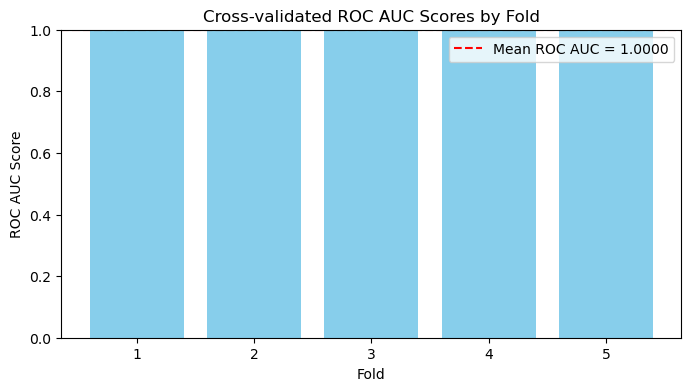

In [30]:
# Visualize the cross-validated ROC AUC scores
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 4))
plt.bar(range(1, len(auc_scores) + 1), auc_scores, color='skyblue')
plt.xlabel('Fold')
plt.ylabel('ROC AUC Score')
plt.title('Cross-validated ROC AUC Scores by Fold')
plt.ylim(0.0, 1.0)
plt.axhline(auc_scores.mean(), color='red', linestyle='--', label=f'Mean ROC AUC = {auc_scores.mean():.4f}')
plt.legend()
plt.show()

**PLEASE CHANGE CODE BELOW TO IMPLEMENT YOUR OWN PREDICTIONS**

In [51]:
# Fit a dummy classifier on the feature columns in train_df

dummy_clf = DummyClassifier(strategy="stratified")
dummy_clf.fit(train_df.drop(['CustomerID', 'Churn'], axis=1), train_df.Churn)

# Create an empty DataFrame for predictions
columns = ['CustomerID', 'predicted_probability']
prediction_df = pd.DataFrame(columns=columns)

# Make predictions on the test set
predicted_probability = dummy_clf.predict_proba(test_df.drop(['CustomerID'], axis=1))[:, 1]


# Add CustomerID and predicted probabilities to the prediction_df
prediction_df['CustomerID'] = test_df['CustomerID']
prediction_df['predicted_probability'] = predicted_probability



Churn                             1.000000
MonthlyCharges                    0.100473
SupportTicketsPerMonth            0.084064
UserRating                        0.022124
WatchlistSize                     0.021739
PaymentMethod_Electronic check    0.016913
GenrePreference_Comedy            0.015876
PaymentMethod_Mailed check        0.014441
GenrePreference_Sci-Fi            0.013183
Gender_Male                       0.007467
SubscriptionType_Standard         0.005692
DeviceRegistered_Mobile           0.001708
DeviceRegistered_Tablet           0.001374
PaperlessBilling                 -0.000923
MultiDeviceAccess                -0.001285
DeviceRegistered_TV              -0.003267
GenrePreference_Drama            -0.003274
ParentalControl                  -0.005531
GenrePreference_Fantasy          -0.005853
ContentType_Movies               -0.006345
ContentType_TV Shows             -0.007029
SubtitlesEnabled                 -0.012372
PaymentMethod_Credit card        -0.028441
Subscriptio

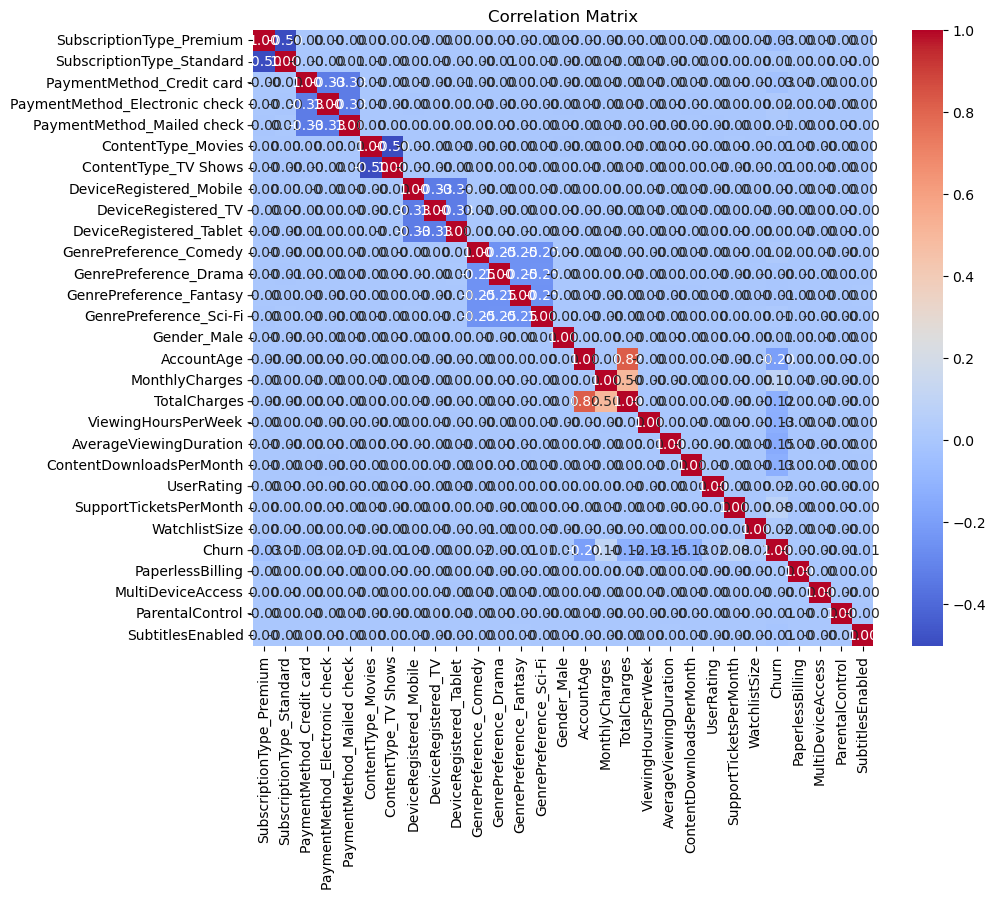

In [24]:


# Calculate the correlation matrix
correlation_matrix = Z_train.corr()

# Extract the correlation of features with the 'Churn' variable
churn_correlation = correlation_matrix['Churn'].sort_values(ascending=False)

# Display the correlation values
print(churn_correlation)

# Optional: Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

The positive coefficient of the correlation indicates more likelihood for a churn than a negative value in this analysis.
* Factor like age has a strong influence on the churn risk, the old the customers, the less likely they will churn
* Other parameters also help  decide like conten downloads per month, subscription of premium and total charges, the higher the subscription the less likey to churn, and paying by a credit card is also good sign of staying. So, from this table, we can keep strong influence variables, in both directions, and the cut off point is I chose, 3rd and 1 quartiles.
* 
ParentalControl                  -0.005531
GenrePreference_Fantasy          -0.005853
ContentType_Movies               -0.006345
ContentType_TV Shows             -0.007029
SubtitlesEnabled                 -0.012372
PaymentMethod_Credit card        -0.028441
SubscriptionType_Premium         -0.033741
TotalCharges                     -0.120529
ViewingHoursPerWeek              -0.128645
ContentDownloadsPerMonth         -0.129752
AverageViewingDuration           -0.146897
AccountAge                       -0.197736

**PLEASE CHANGE CODE ABOVE TO IMPLEMENT YOUR OWN PREDICTIONS**

## Final Tests - **IMPORTANT** - the cells below must be run prior to submission

Below are some tests to ensure your submission is in the correct format for autograding. The autograding process accepts a csv `prediction_submission.csv` which we will generate from our `prediction_df` below. Please run the tests below an ensure no assertion errors are thrown.

In [ ]:
#FINAL TEST CELLS - please make sure all of your code is above these test cells
#Writing to csv for autograding purposes
# Add CustomerID and predicted probabilities to the prediction_df
# Ensure both DataFrames have the same number of rows and aligned order
assert len(prediction_df) == len(test_df), "DataFrames must have the same length"

# Replace the CustomerID column in prediction_df with the one from test_df
prediction_df['CustomerID'] = test_df['CustomerID'].values
prediction_df['predicted_probability'] = predicted_probability
#Write to csv
prediction_df.to_csv("prediction_submission.csv", index=False)
submission = pd.read_csv("prediction_submission.csv")

assert isinstance(submission, pd.DataFrame), 'You should have a dataframe named prediction_df.'

In [ ]:
# FINAL TEST CELLS - please make sure all of your code is above these test cells

assert submission.columns[0] == 'CustomerID', 'The first column name should be CustomerID.'
assert submission.columns[1] == 'predicted_probability', 'The second column name should be predicted_probability.'

In [88]:
# FINAL TEST CELLS - please make sure all of your code is above these test cells

assert submission.shape[0] == 104480, 'The dataframe prediction_df should have 104480 rows.'

In [ ]:
# FINAL TEST CELLS - please make sure all of your code is above these test cells

assert submission.shape[1] == 2, 'The dataframe prediction_df should have 2 columns.'

In [ ]:
# FINAL TEST CELLS - please make sure all of your code is above these test cells

## This cell calculates the auc score and is hidden. Submit Assignment to see AUC score.

## SUBMIT YOUR WORK!

Once we are happy with our `prediction_df` and `prediction_submission.csv` we can now submit for autograding! Submit by using the blue **Submit Assignment** at the top of your notebook. Don't worry if your initial submission isn't perfect as you have multiple submission attempts and will obtain some feedback after each submission!